In [55]:
!apt-get install graphviz -y
!pip install pydotplus graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


# Spam dataset with ensemble methods

### Importing packages

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

### Plotting functions

In [57]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels, fix_margins=True):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    if fix_margins:
        plt.xlim(0, 11)
        plt.ylim(0, 11)
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 100,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 100,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('Lottery')
    plt.ylabel('Sale')
    plt.legend(['Spam','Ham'])

def plot_model(X, y, model, fix_margins=True):
    X = np.array(X)
    y = np.array(y)
    plot_points(X, y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    if fix_margins:
        x_min=0
        y_min=0
        x_max=12
        y_max=12
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plt.show()

def display_tree(dt):
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

# The spam email dataset

In [58]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


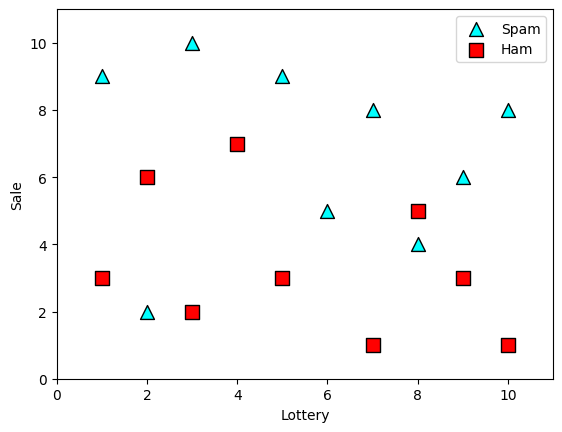

In [59]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
plot_points(features, labels)

In [60]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

# Training a decision tree

In [61]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

def display_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=['Lottery', 'Sale'],
                    class_names=['Ham', 'Spam'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


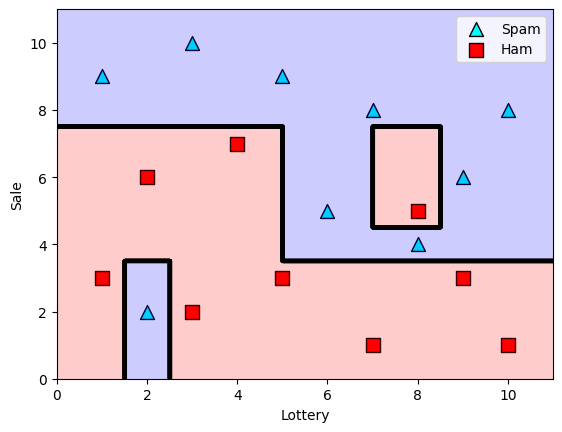

In [62]:
plot_model(features, labels, decision_tree_classifier)

# Training a random forest by hand

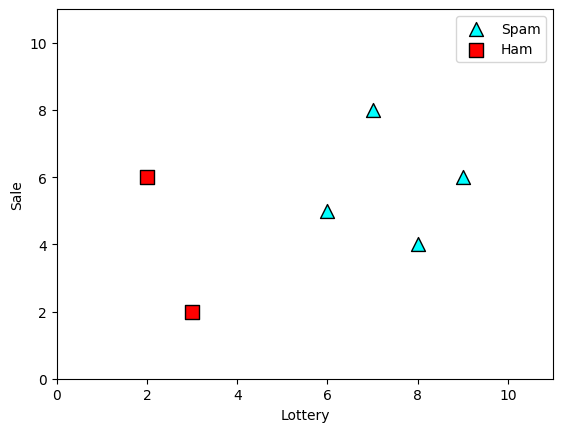

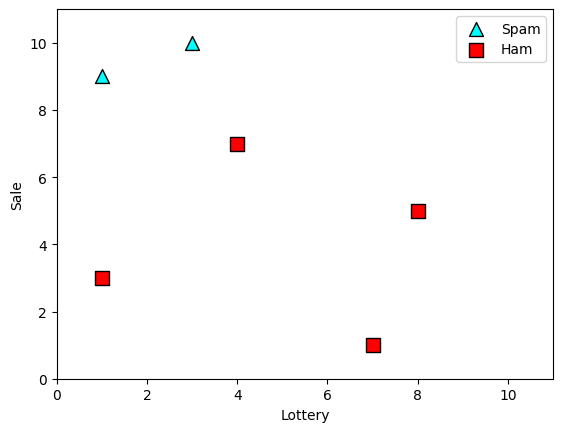

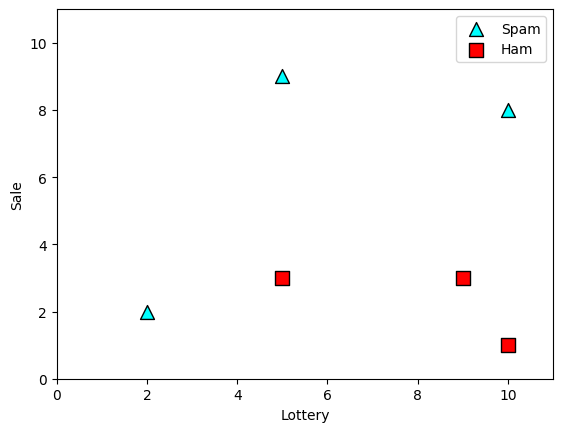

In [63]:
first_batch = spam_dataset.loc[[0,1,2,3,4,5]]
features1 = first_batch[['Lottery', 'Sale']]
labels1 = first_batch['Spam']
plot_points(features1, labels1)
plt.show()

second_batch = spam_dataset.loc[[6,7,8,9,10,11]]
features2 = second_batch[['Lottery', 'Sale']]
labels2 = second_batch['Spam']
plot_points(features2, labels2)
plt.show()

third_batch = spam_dataset.loc[[12,13,14,15,16,17]]
features3 = third_batch[['Lottery', 'Sale']]
labels3 = third_batch['Spam']
plot_points(features3, labels3)

Weak learner 1 training accuracy: 1.0


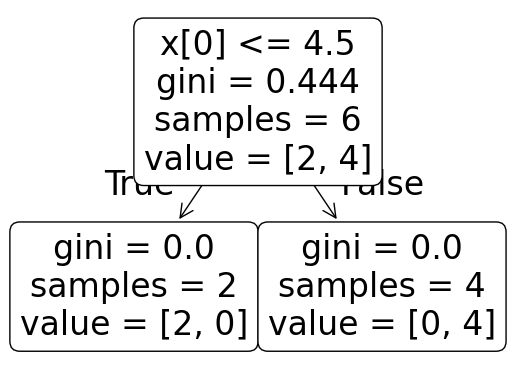

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


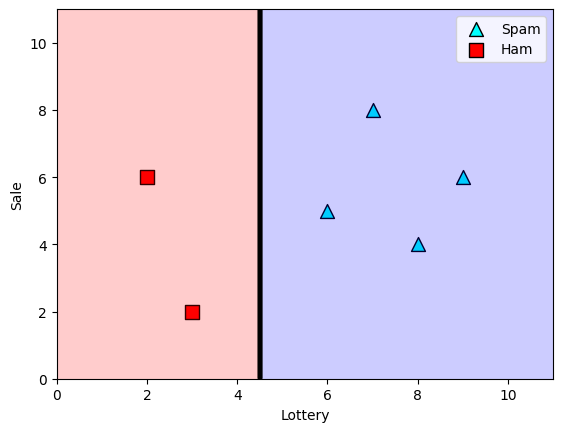

Weak learner 2 training accuracy: 1.0


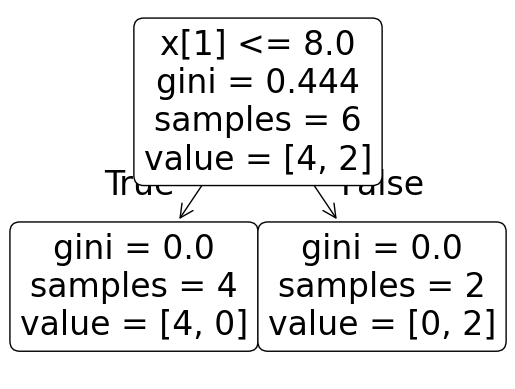

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


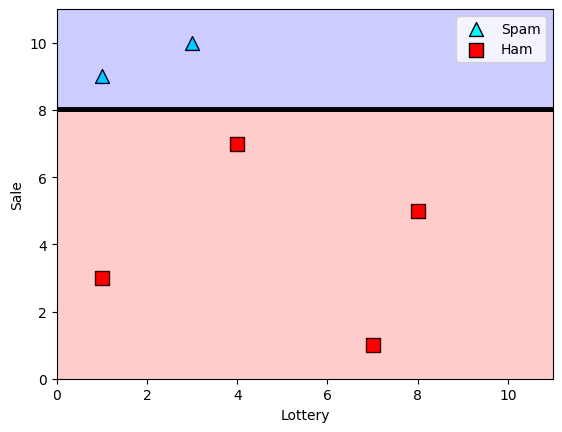

Weak learner 3 training accuracy: 0.8333333333333334


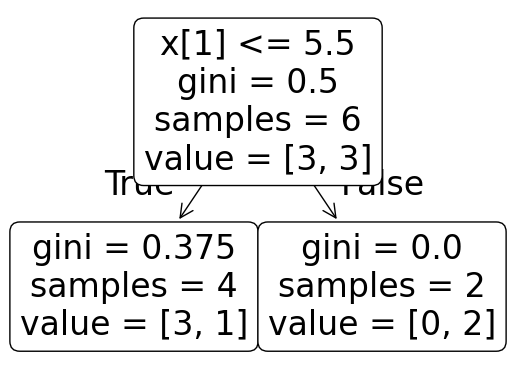

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


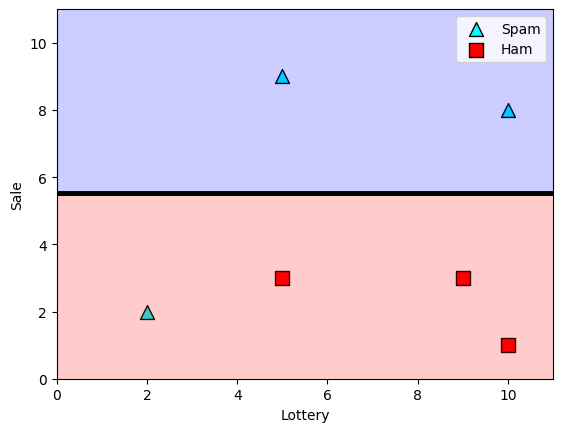

In [64]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt1.fit(features1, labels1)
print("Weak learner 1 training accuracy:", dt1.score(features1, labels1))
tree.plot_tree(dt1, rounded=True)
plt.show()
plot_model(features1, labels1, dt1)

dt2 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt2.fit(features2, labels2)
print("Weak learner 2 training accuracy:", dt2.score(features2, labels2))
tree.plot_tree(dt2, rounded=True)
plt.show()
plot_model(features2, labels2, dt2)

dt3 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt3.fit(features3, labels3)
print("Weak learner 3 training accuracy:", dt3.score(features3, labels3))
tree.plot_tree(dt3, rounded=True)
plt.show()
plot_model(features3, labels3, dt3)

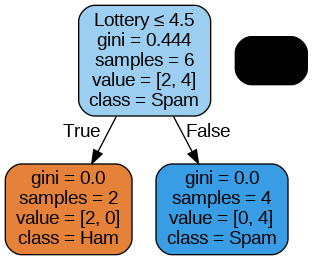

In [65]:
display_tree(dt1)

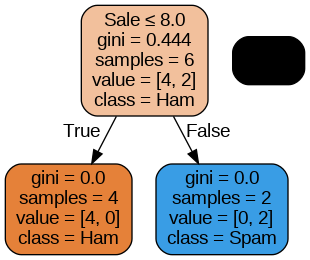

In [66]:
display_tree(dt2)

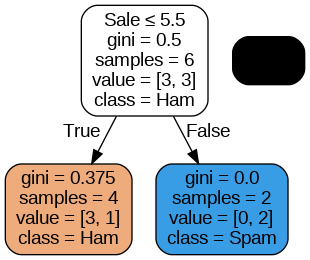

In [67]:
display_tree(dt3)

# Training a random forest using sklearn

In [68]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=1)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


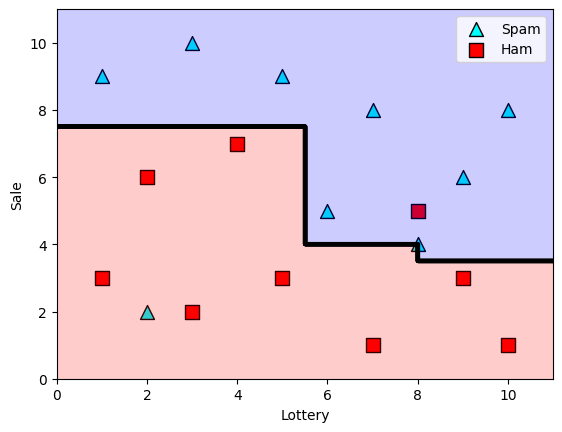

In [69]:
plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


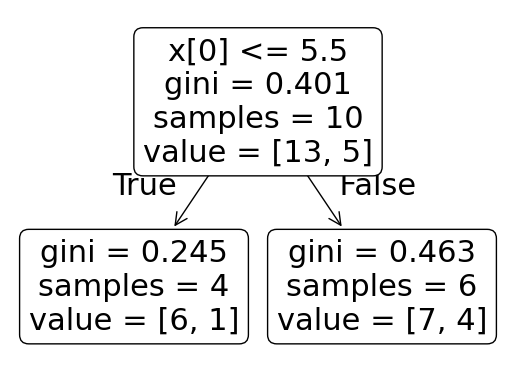

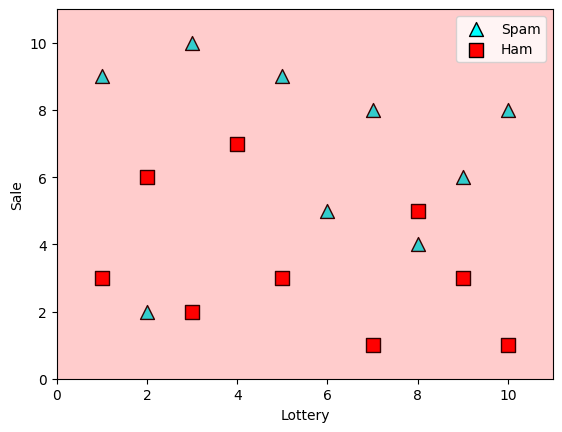

****************************** Estimator ******************************


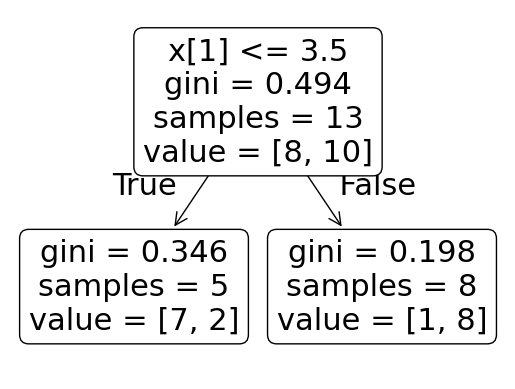

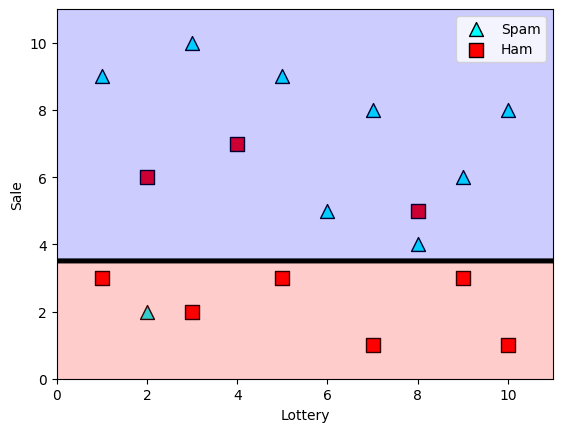

****************************** Estimator ******************************


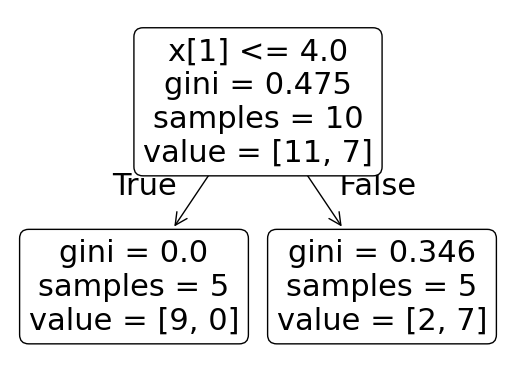

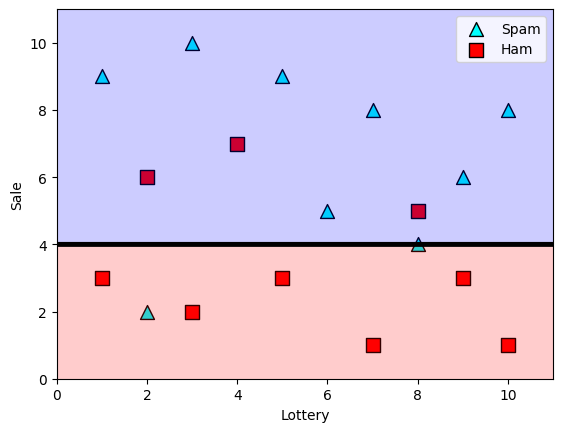

****************************** Estimator ******************************


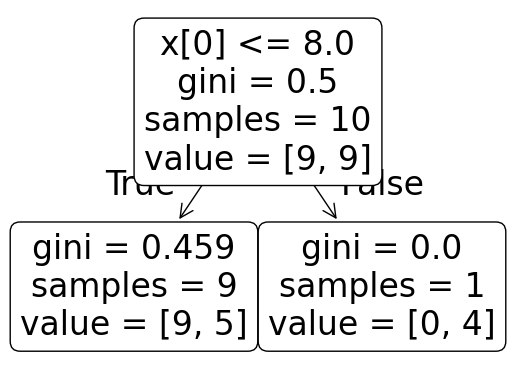

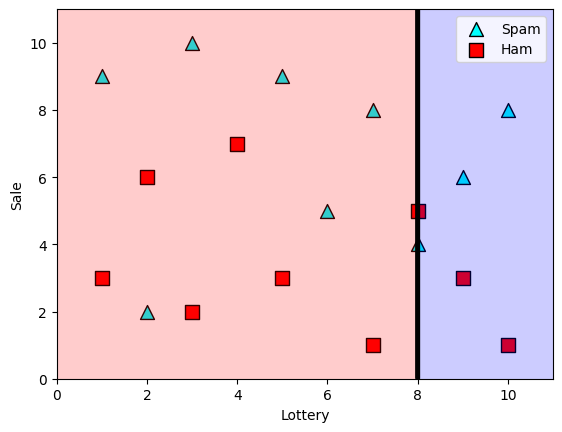

****************************** Estimator ******************************


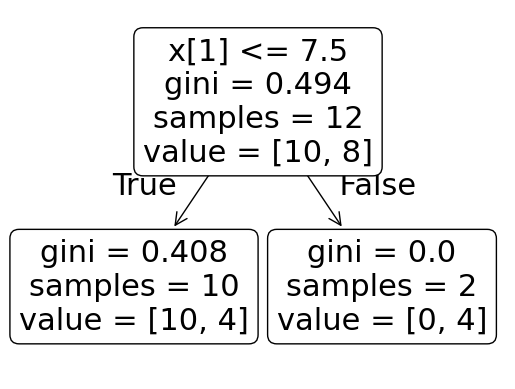

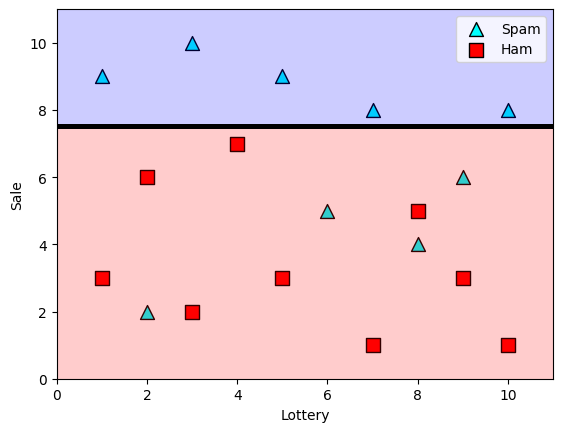

In [70]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    plot_model(features, labels, dt)
    plt.show()

# AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier
# Set the random_state so that we always get the same results
adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=100)
adaboost_classifier.fit(features, labels)
adaboost_classifier.score(features, labels)

1.0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


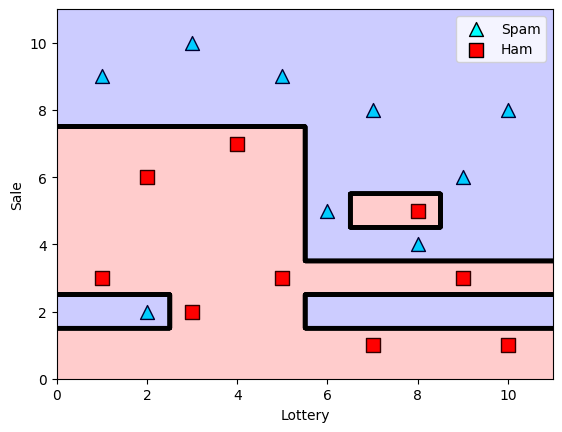

In [72]:
plot_model(features, labels, adaboost_classifier)

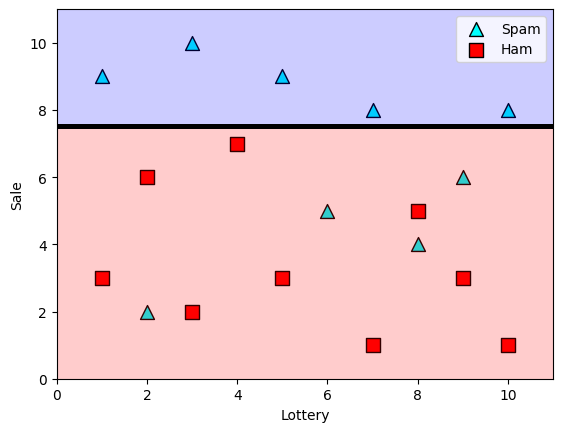

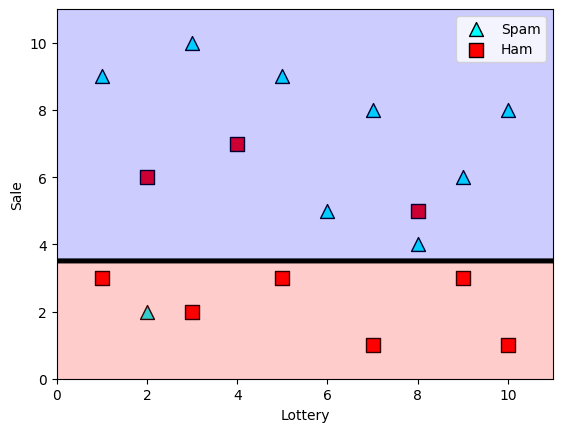

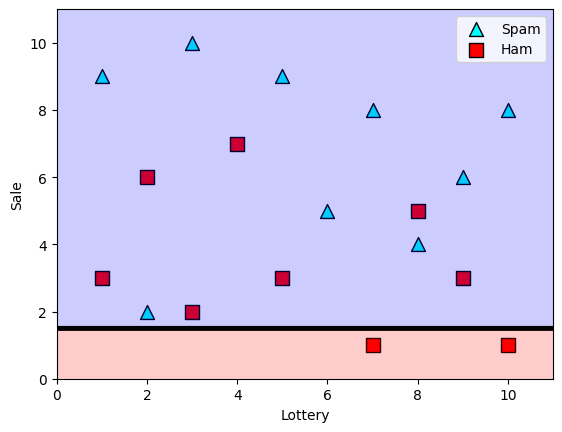

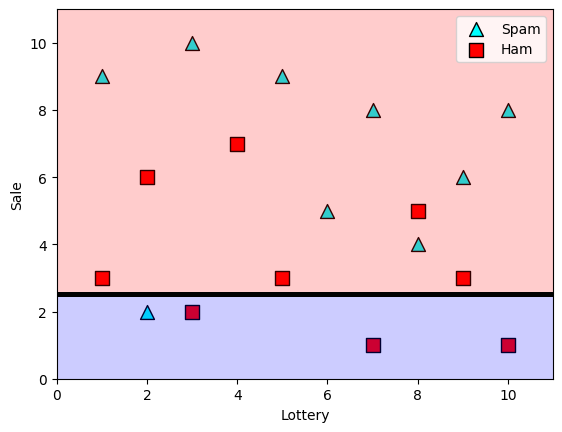

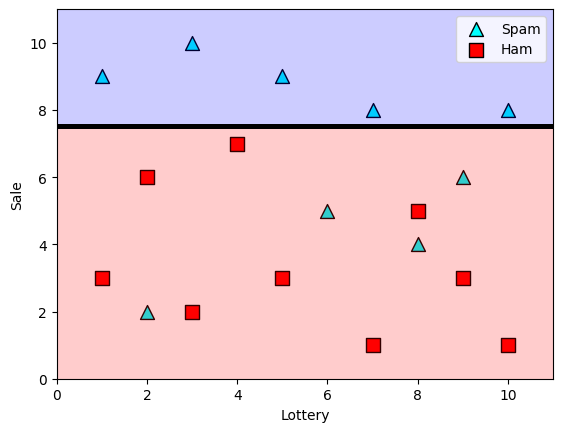

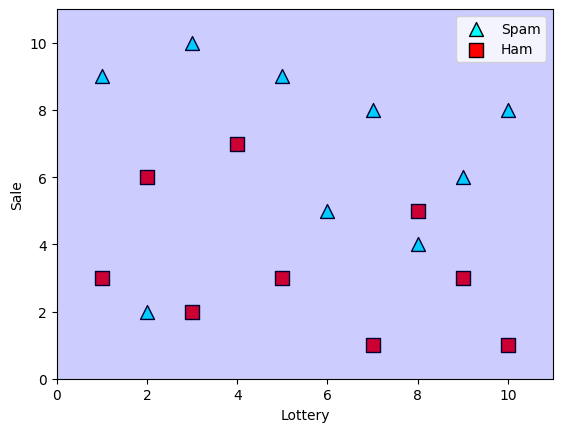

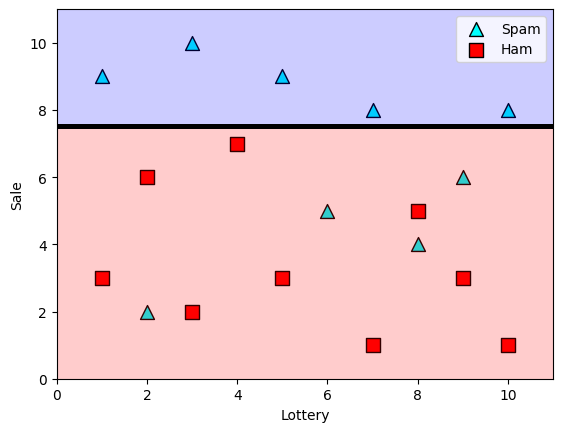

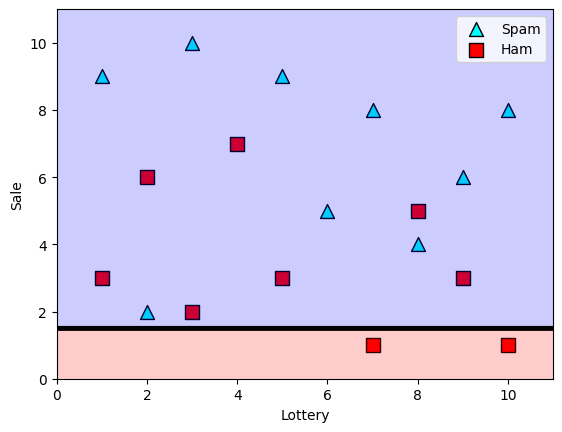

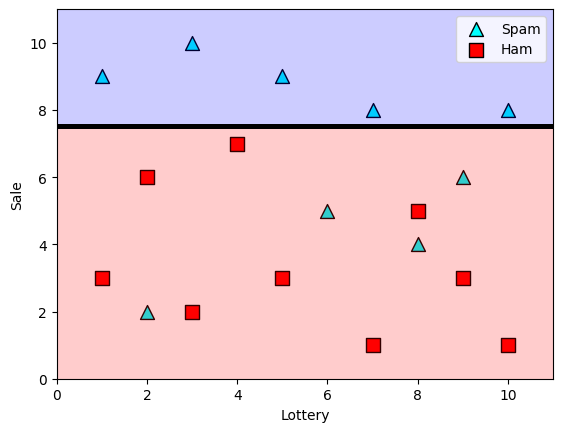

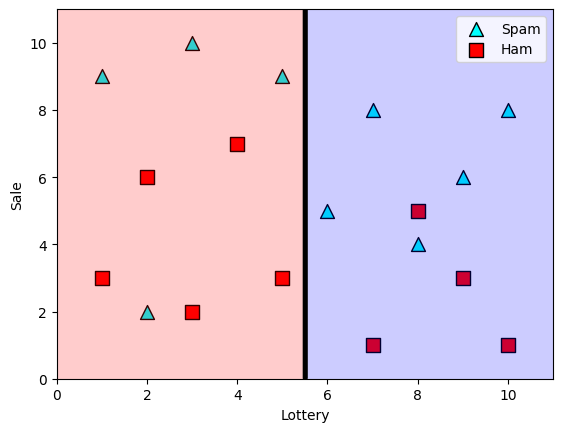

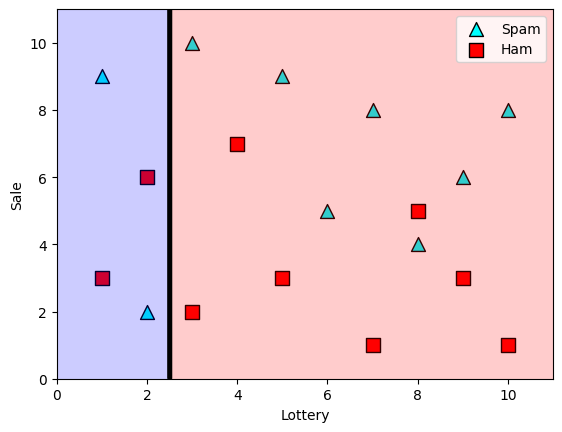

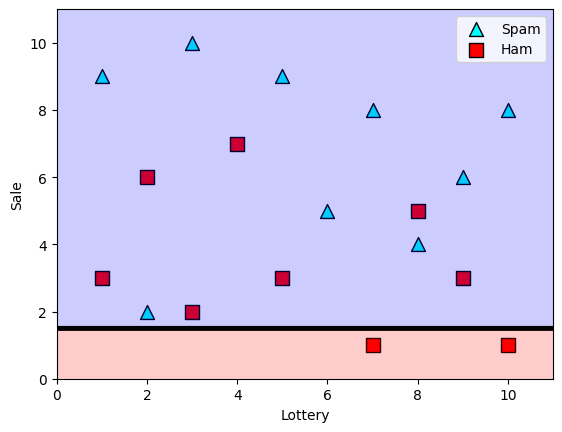

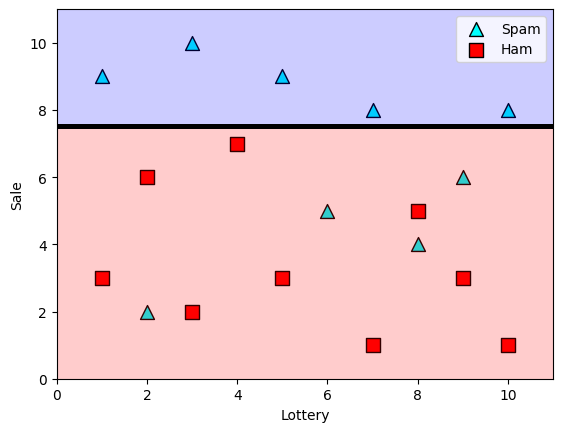

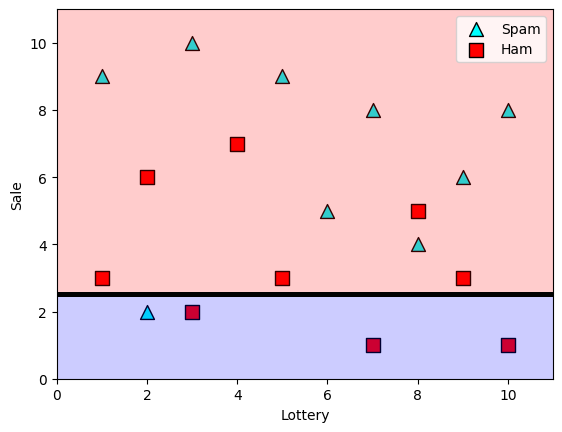

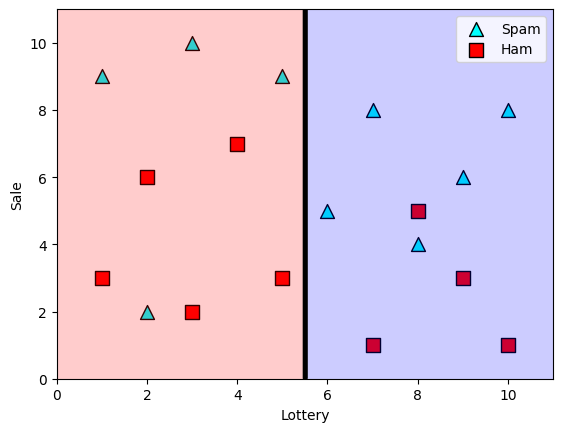

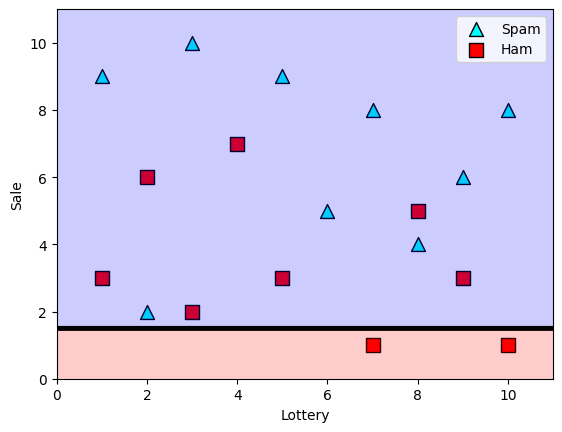

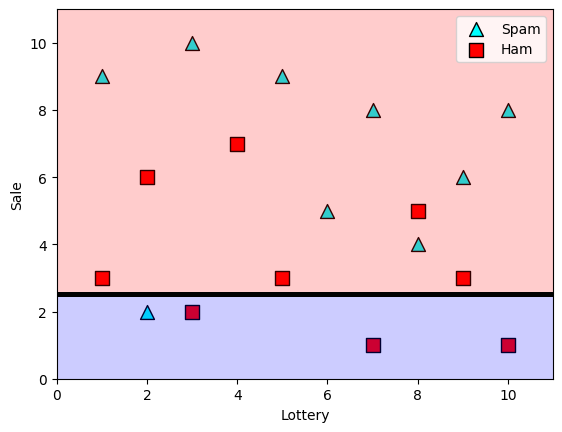

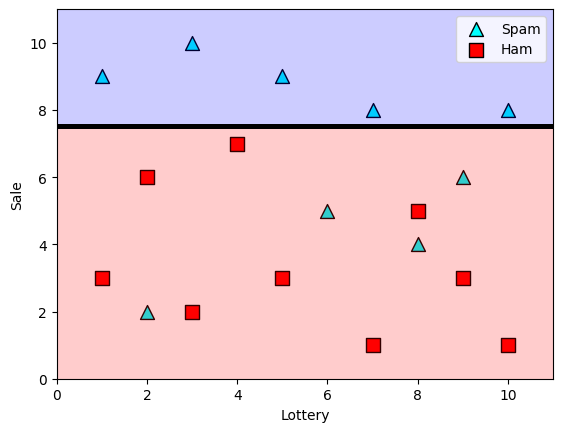

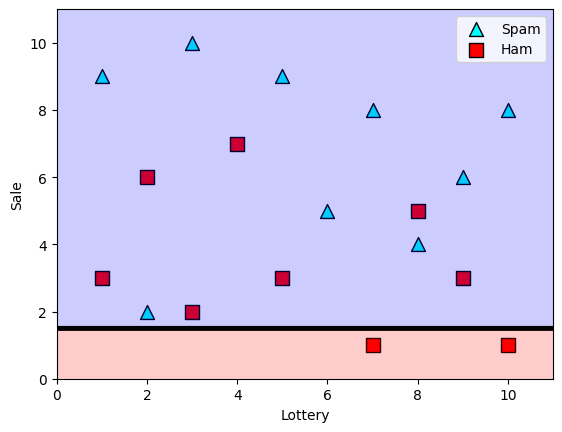

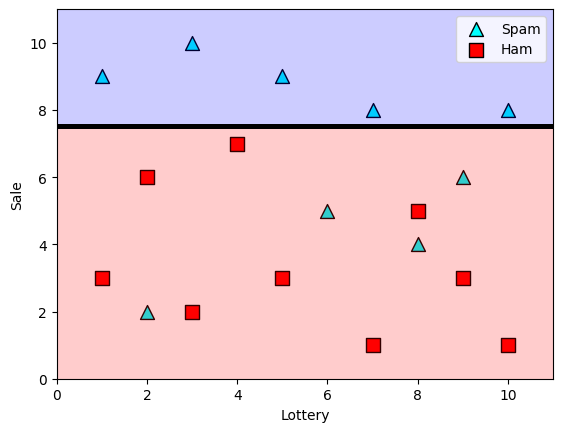

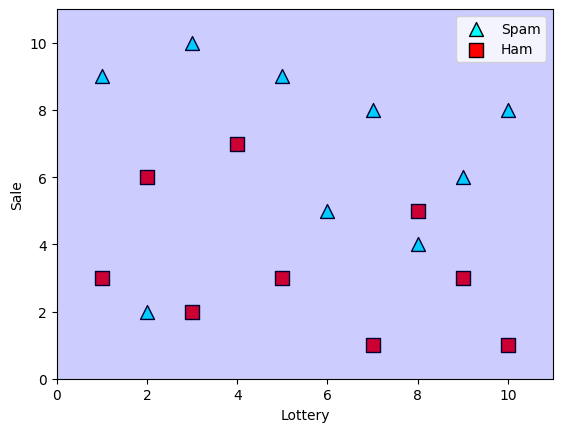

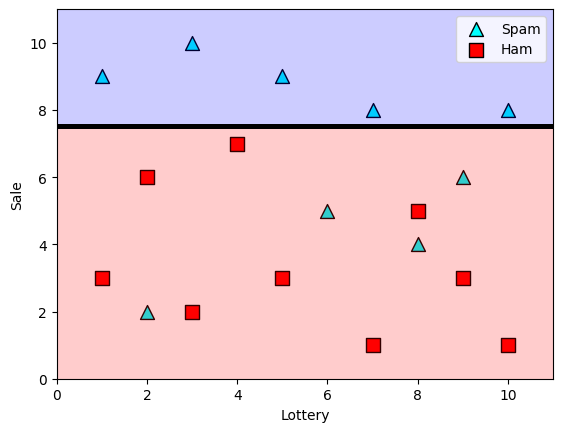

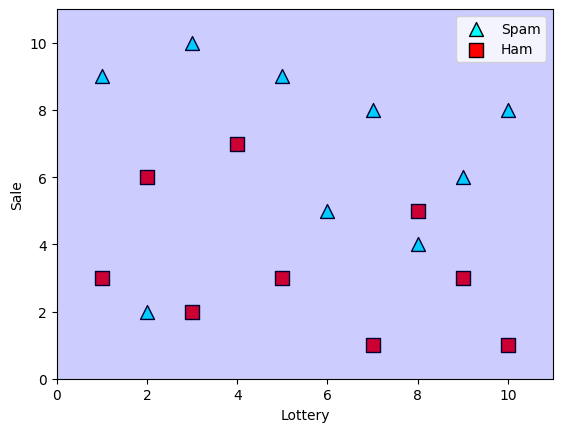

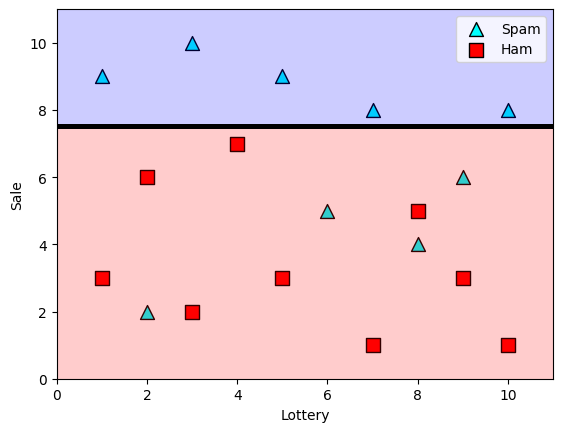

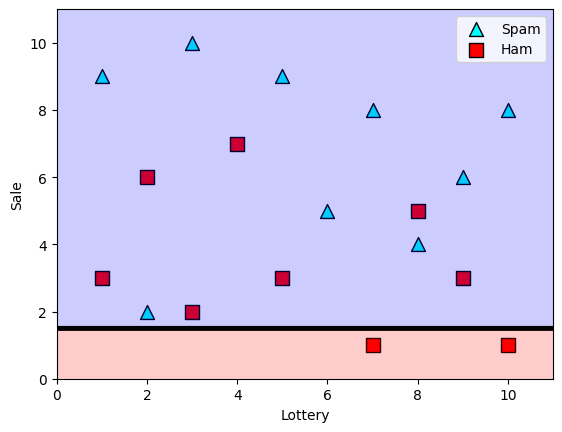

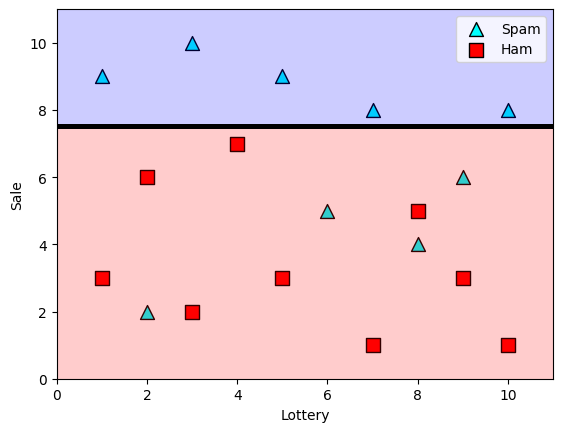

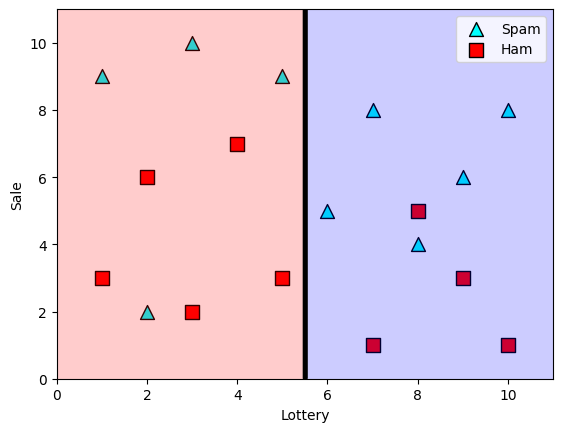

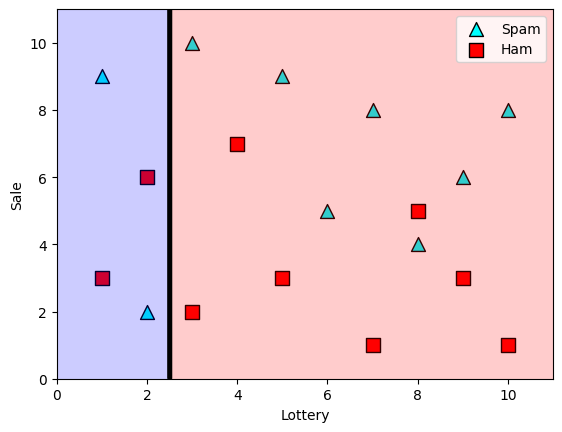

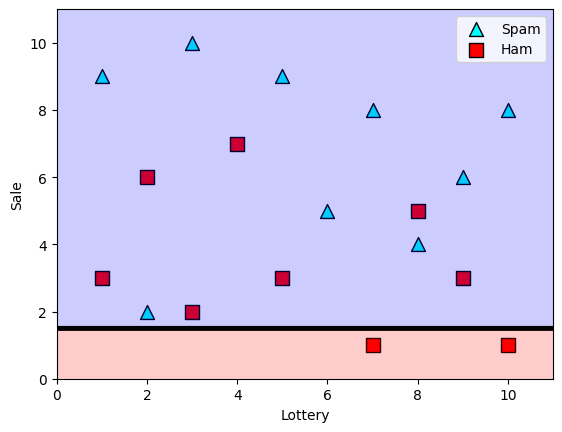

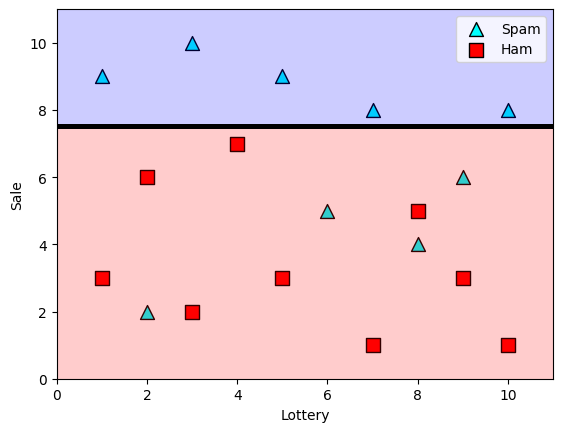

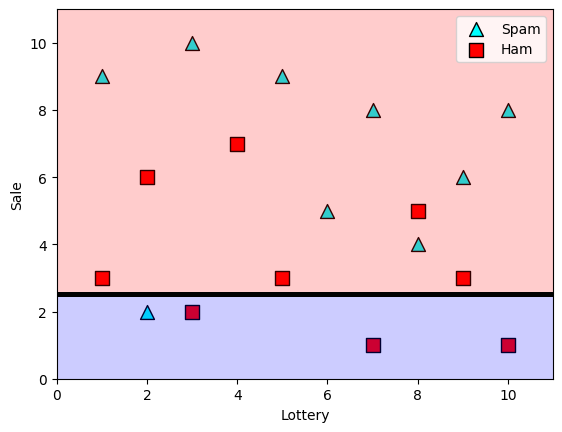

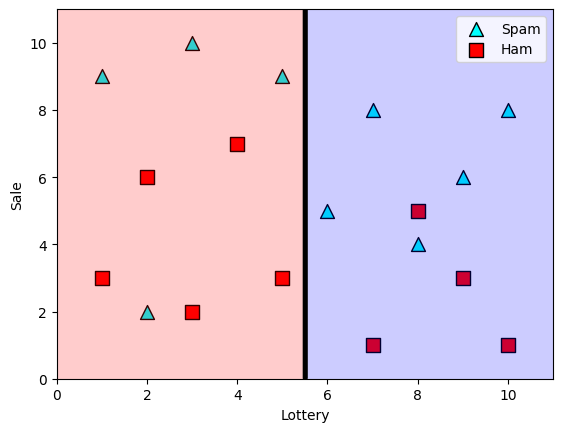

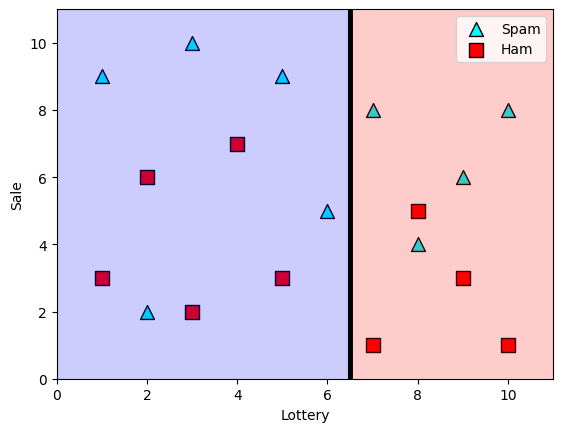

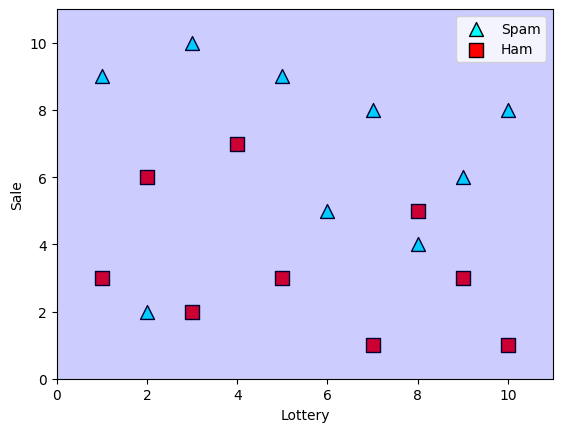

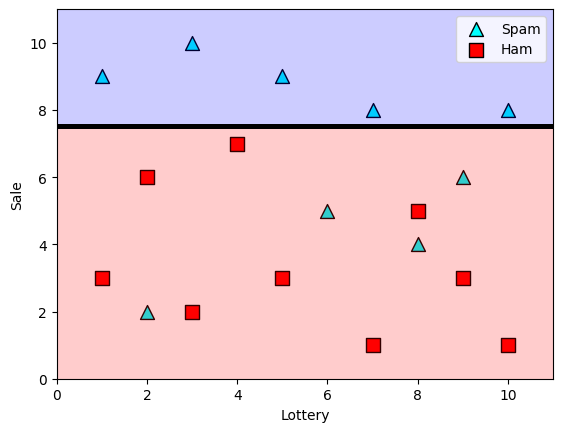

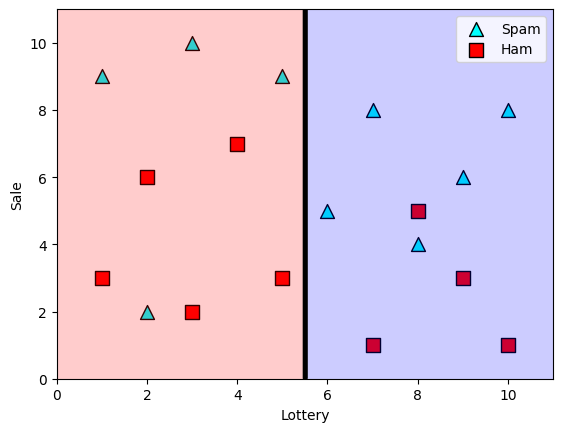

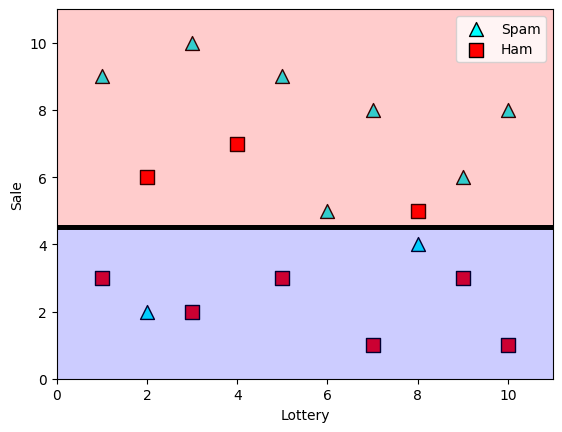

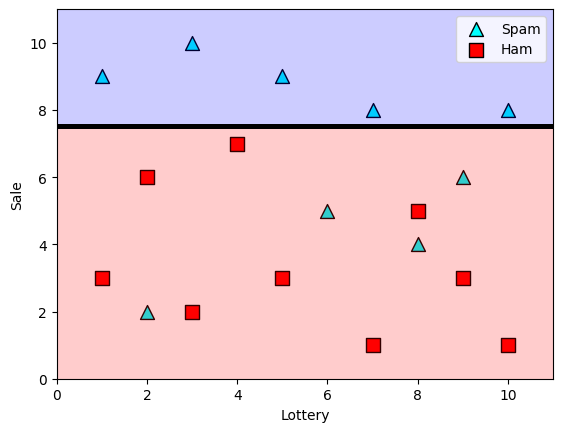

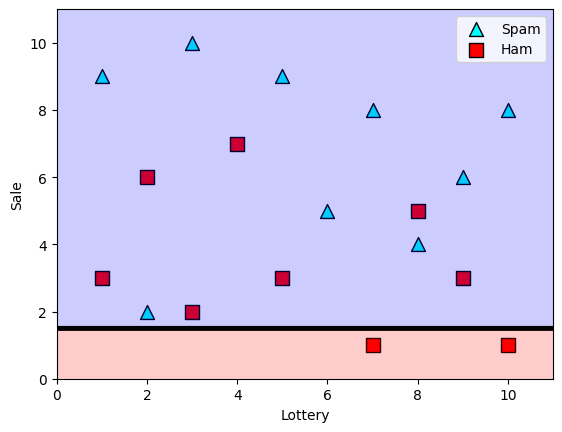

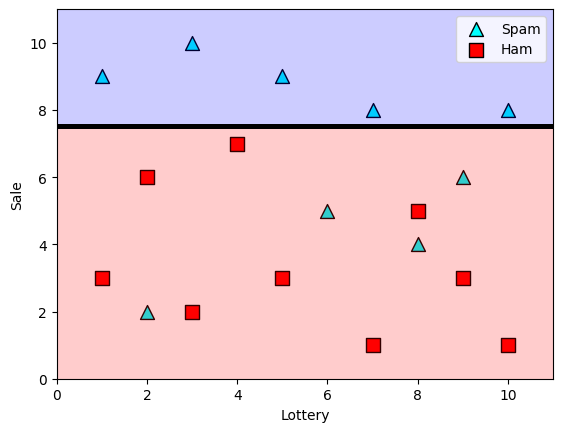

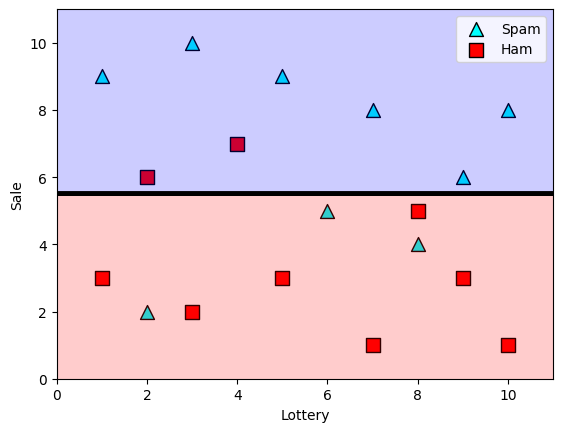

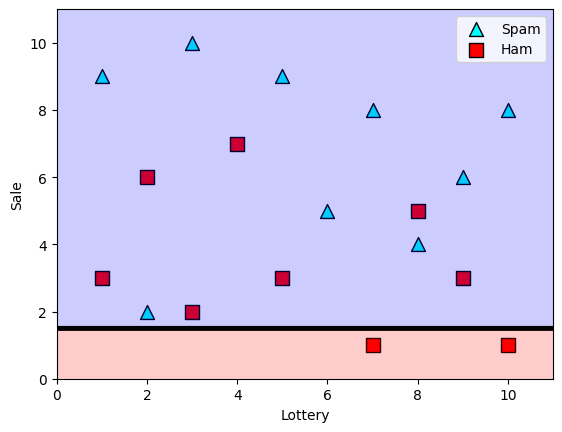

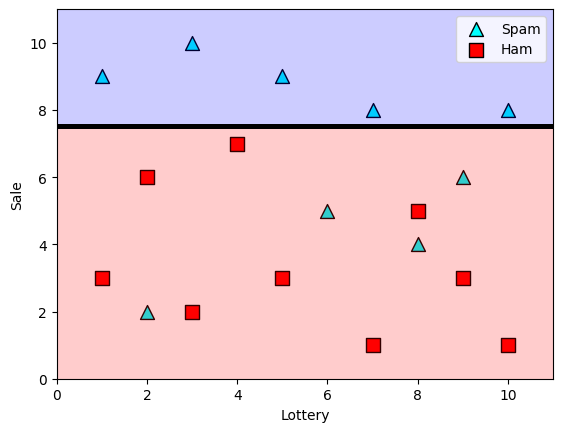

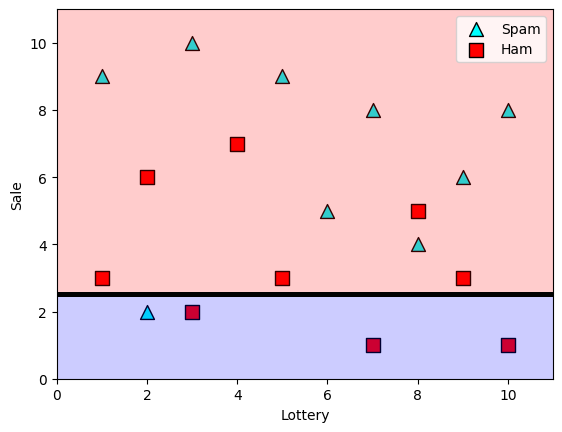

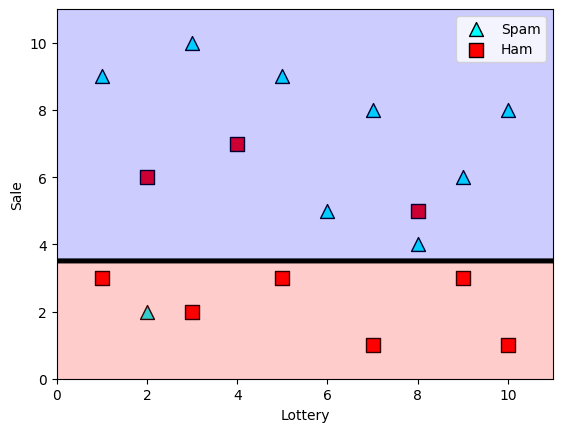

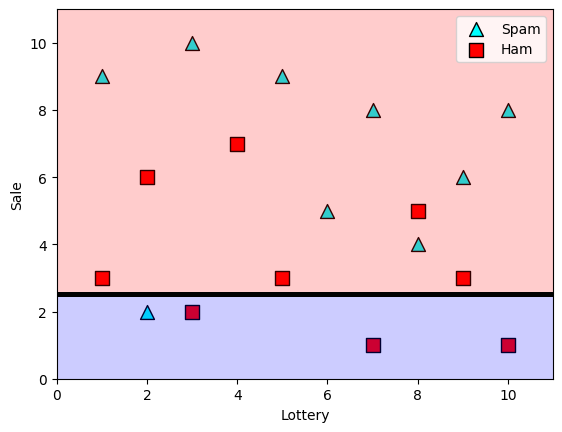

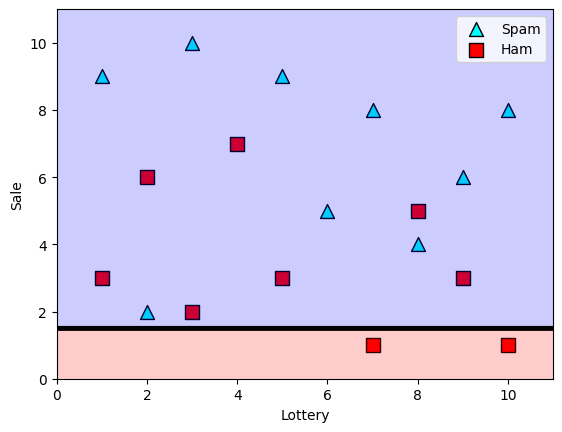

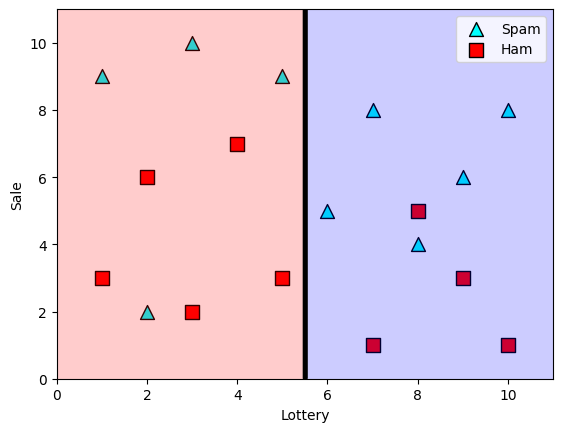

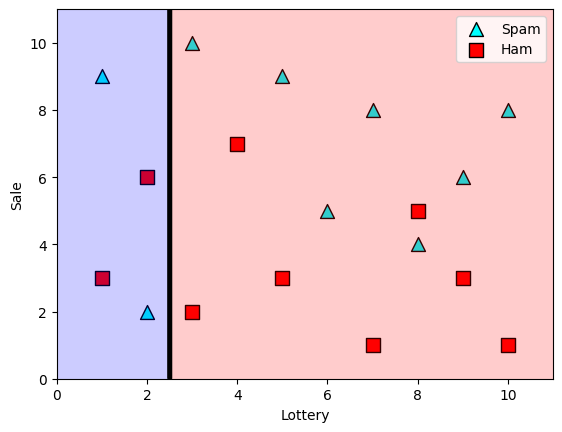

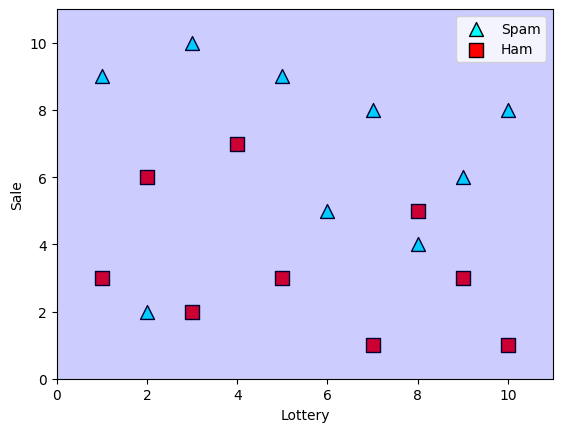

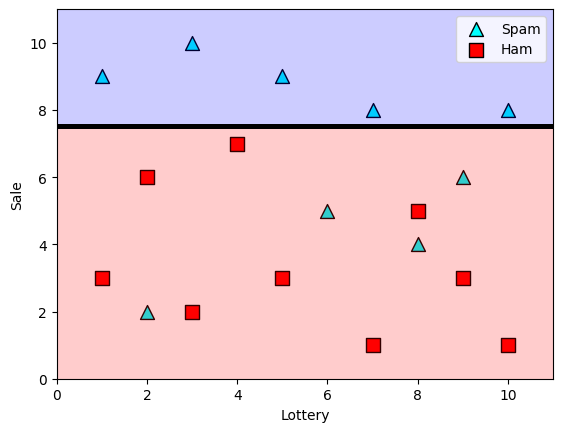

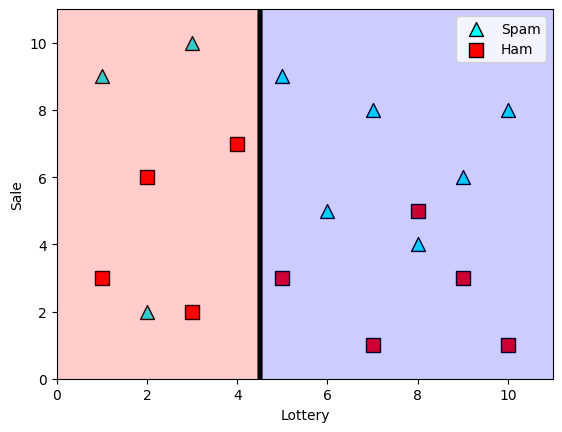

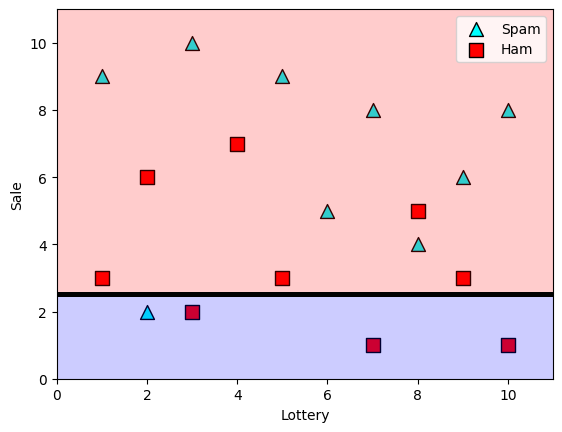

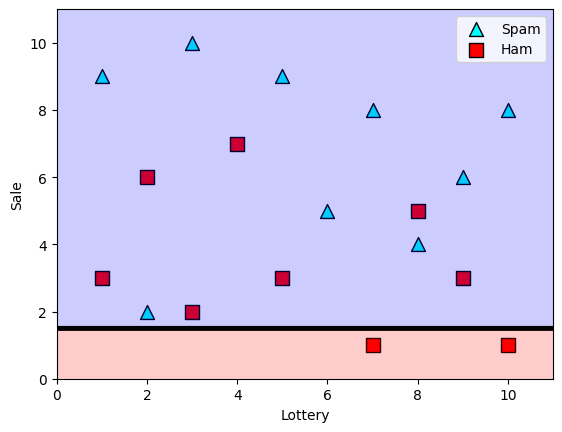

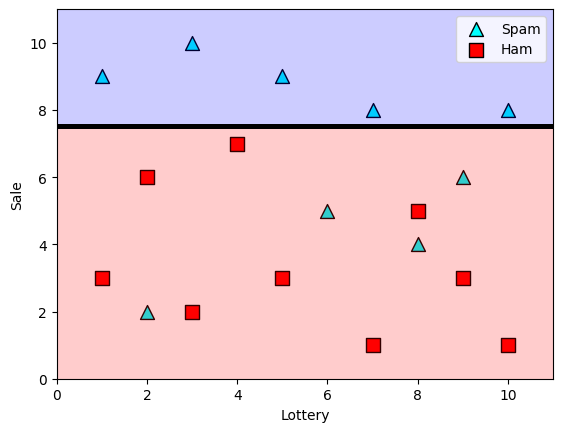

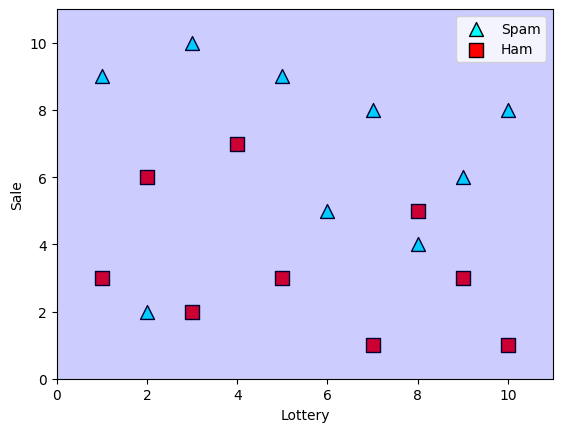

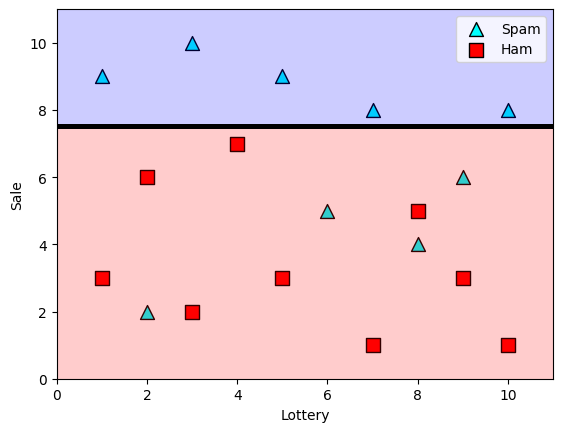

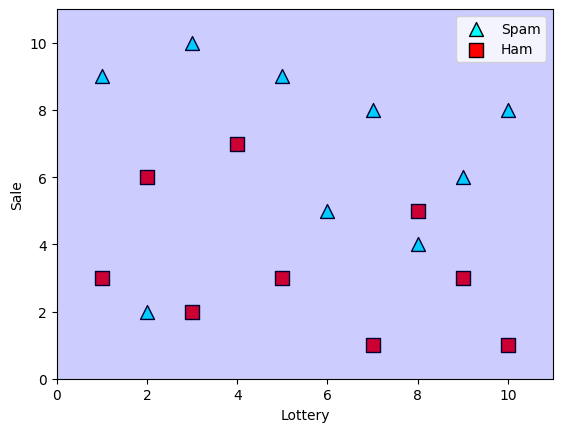

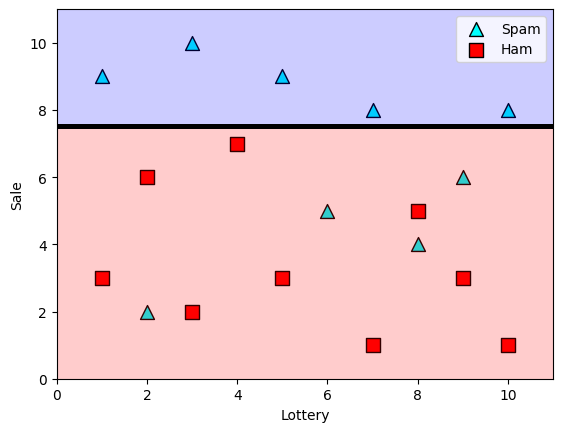

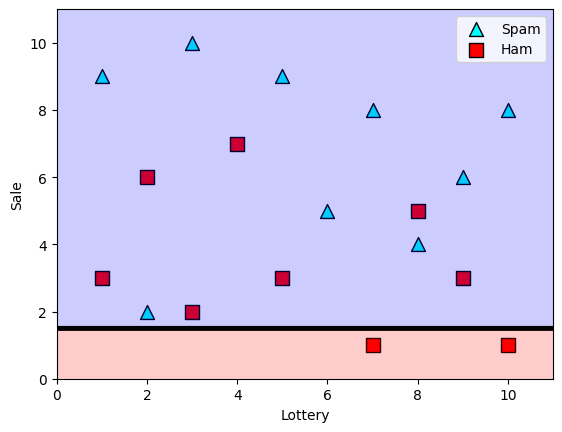

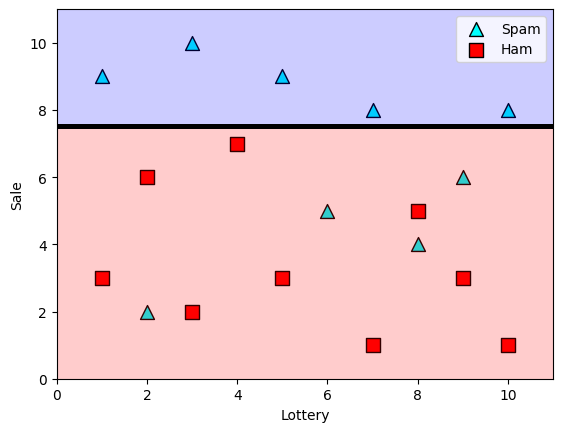

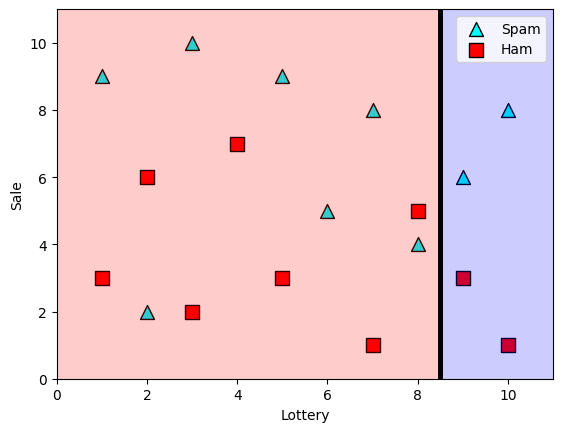

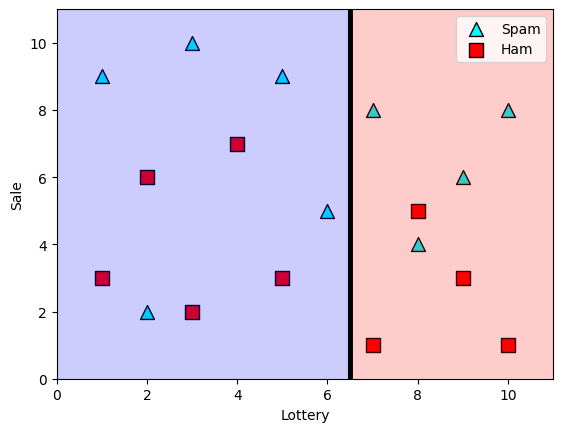

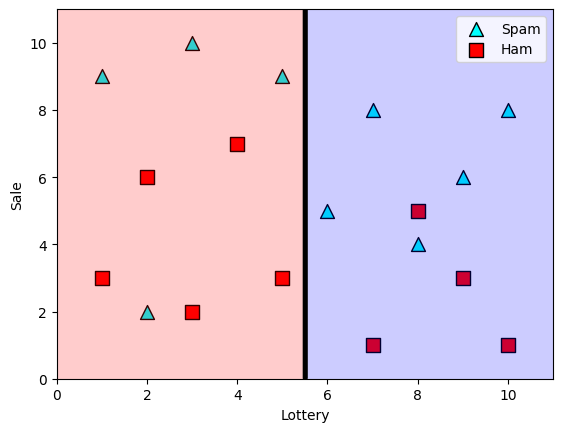

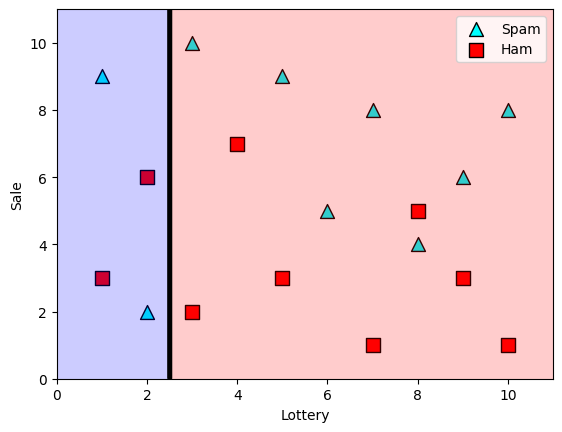

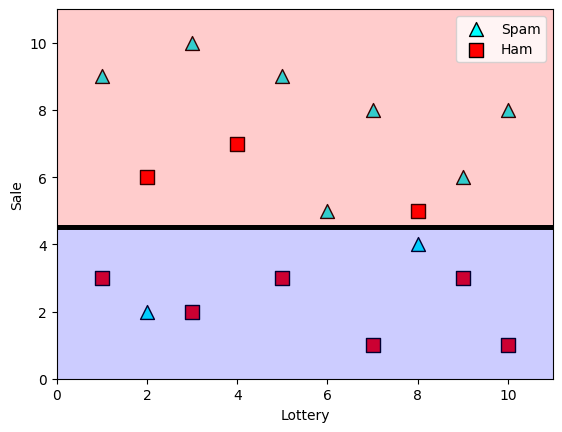

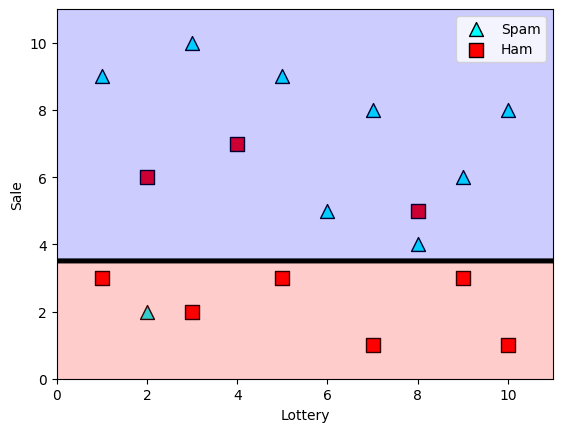

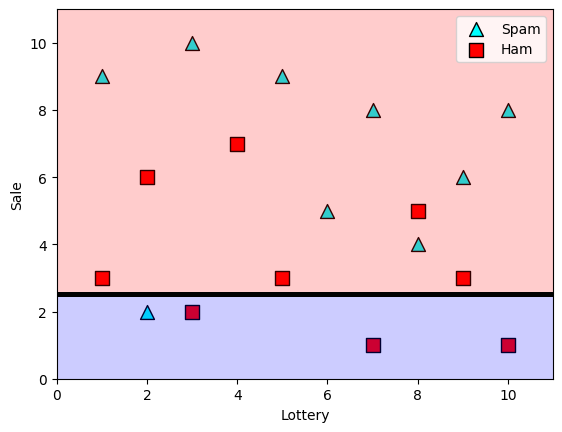

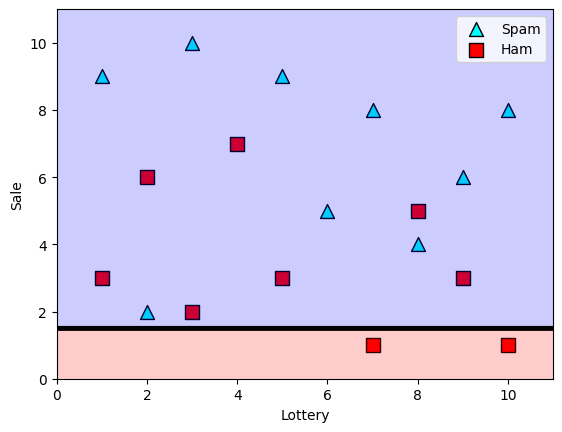

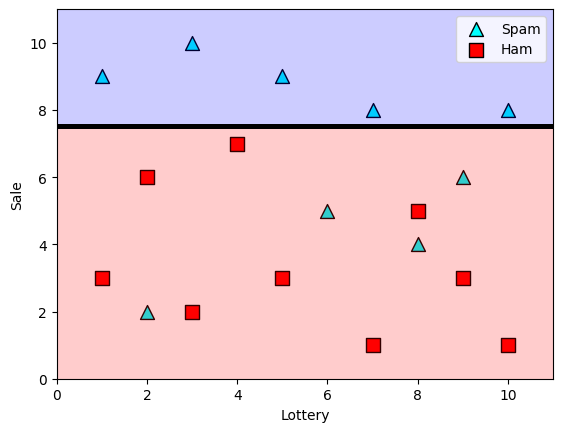

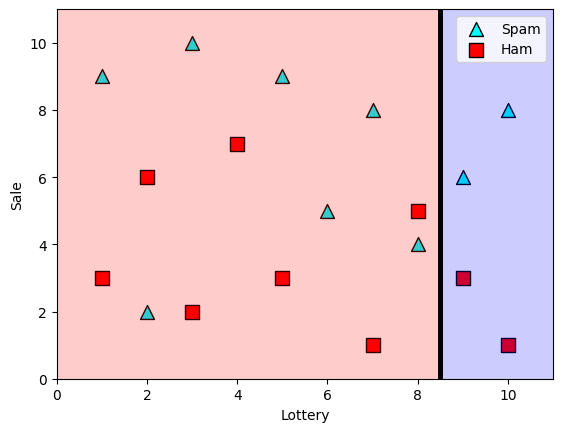

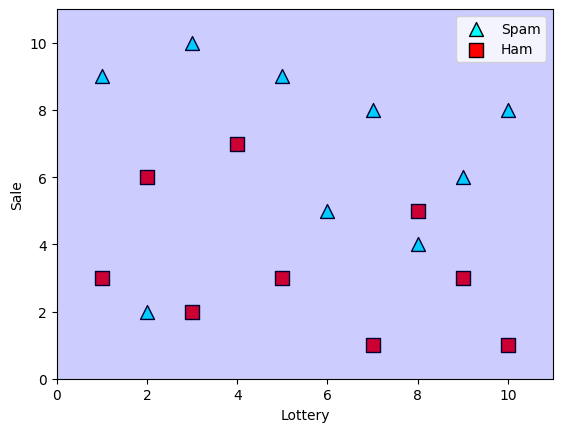

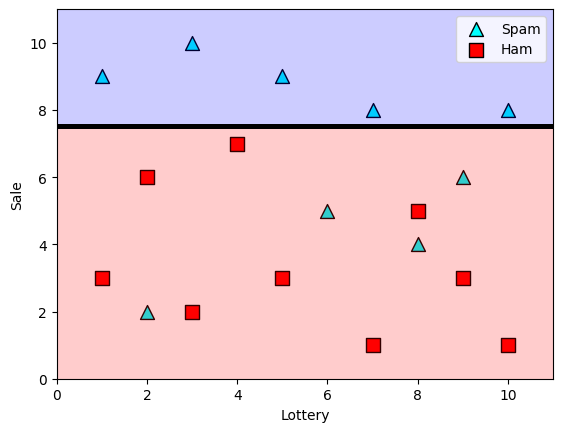

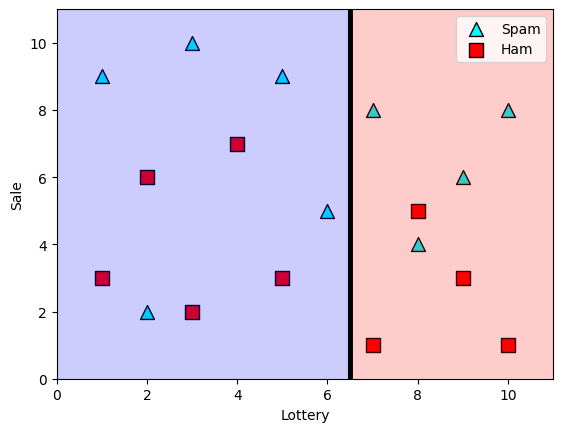

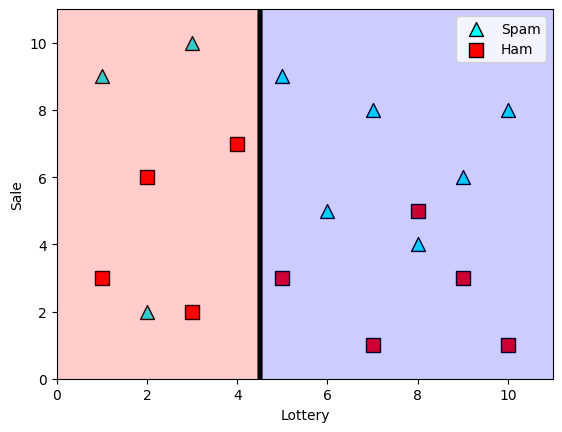

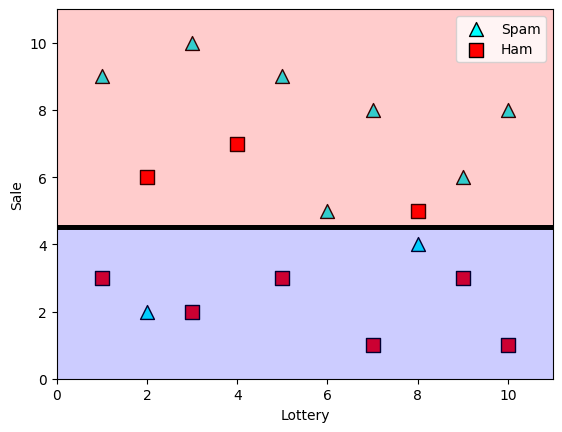

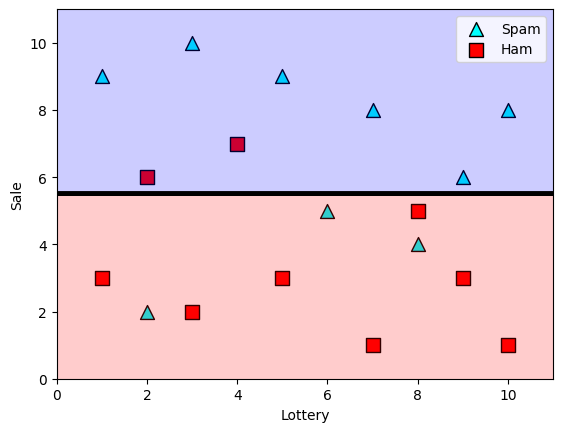

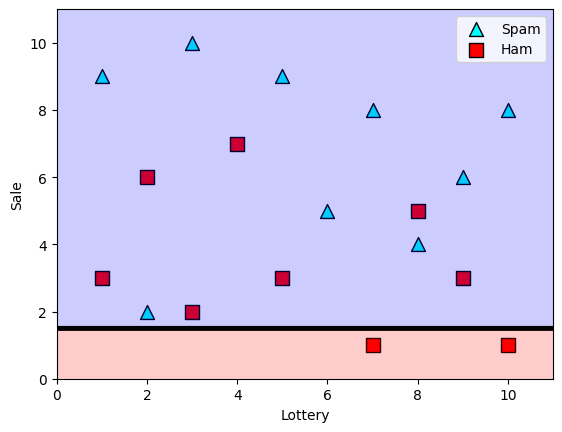

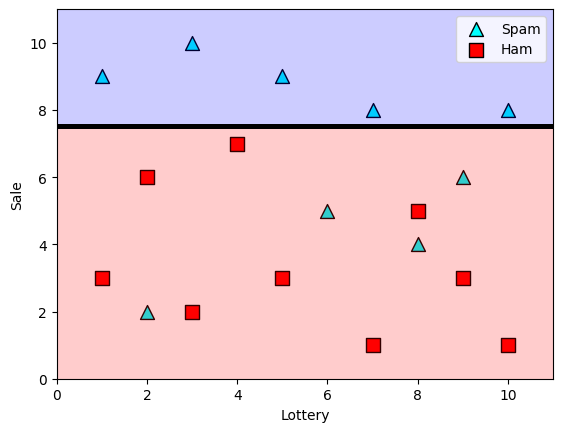

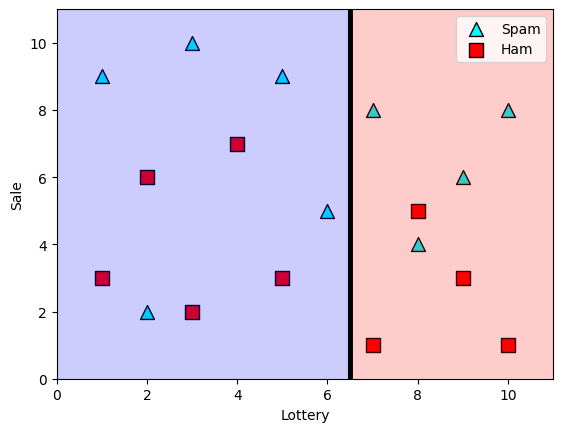

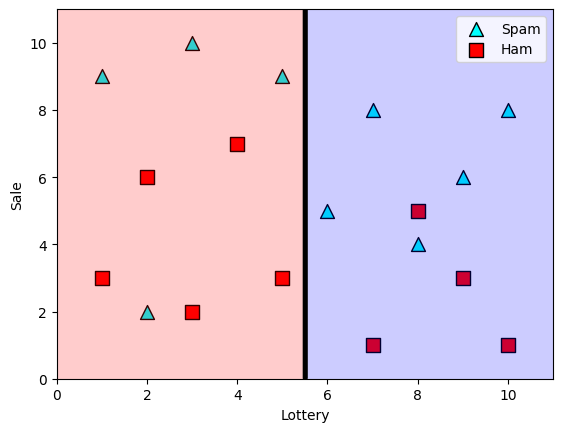

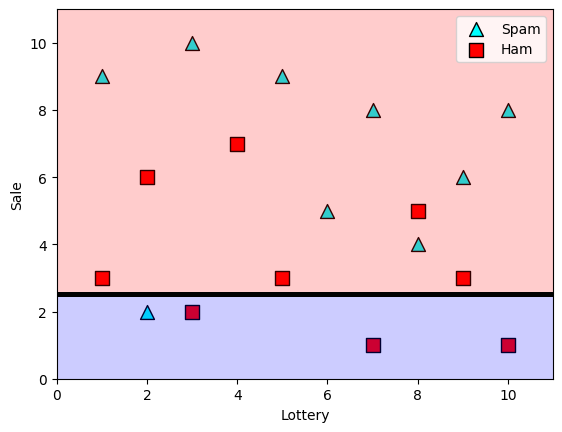

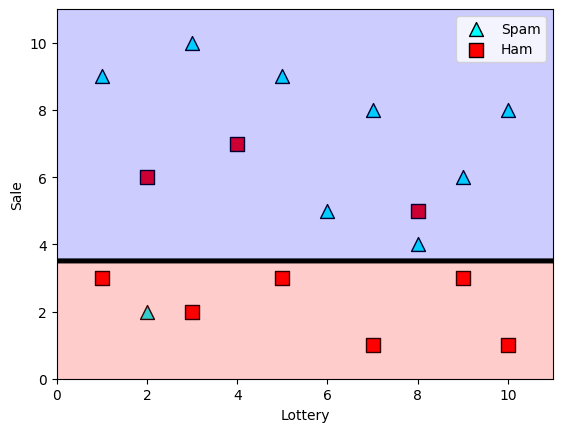

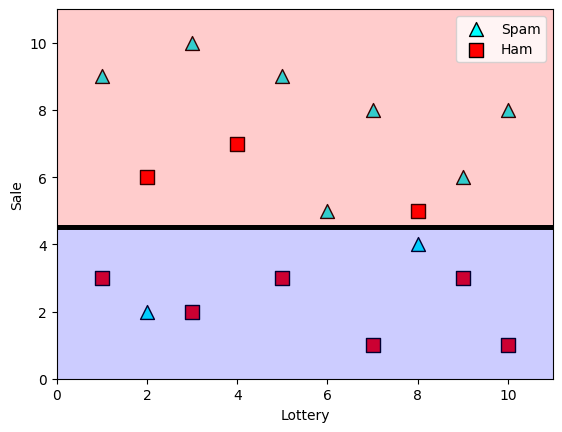

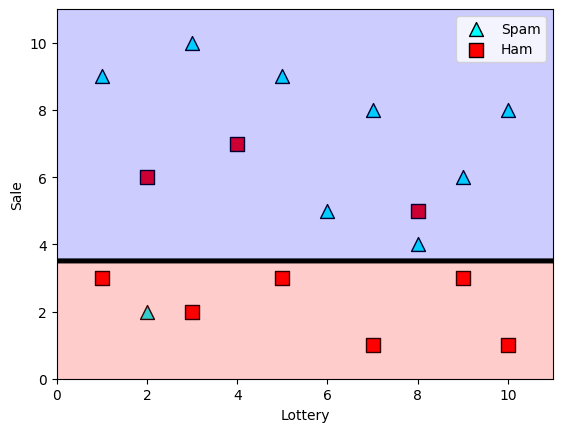

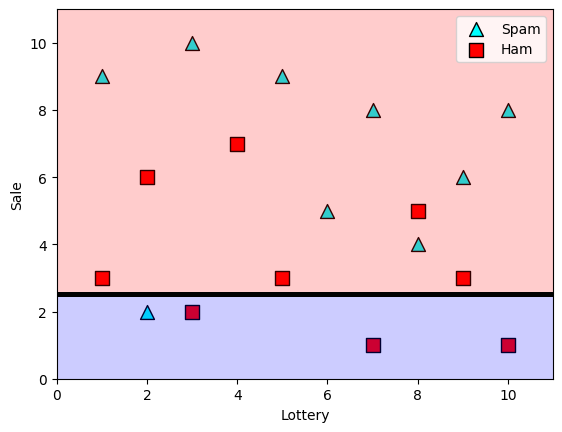

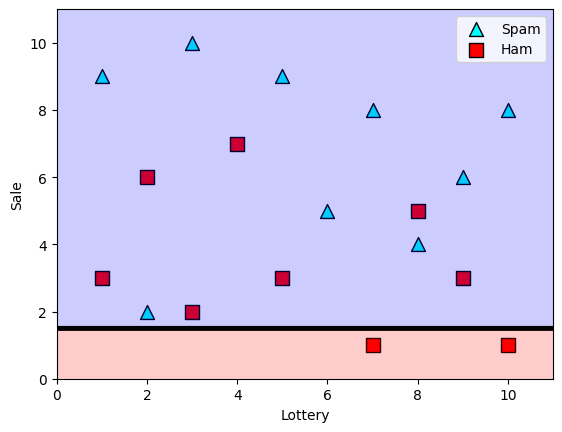

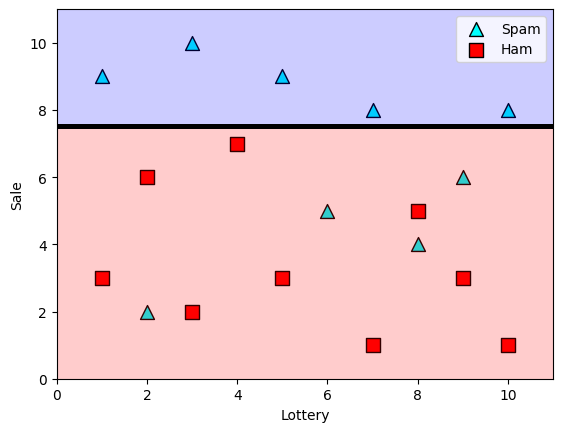

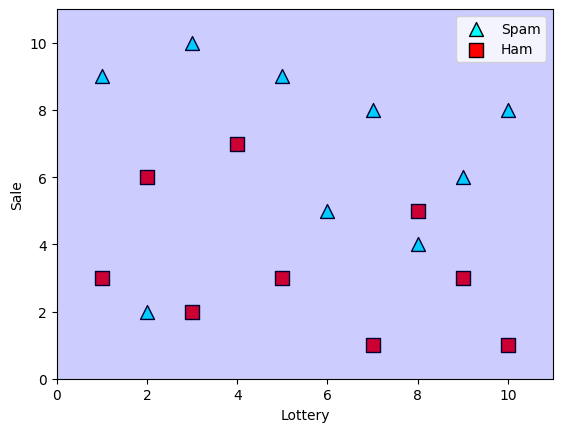

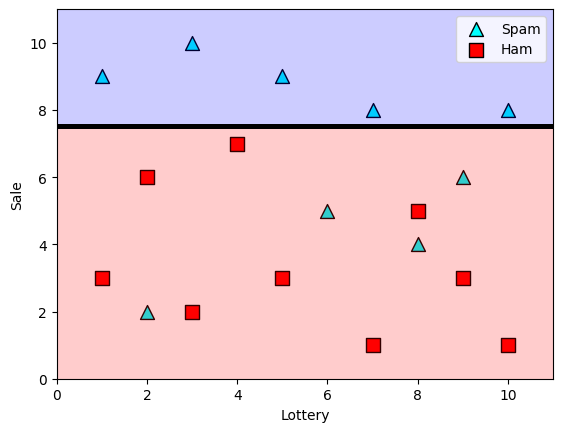

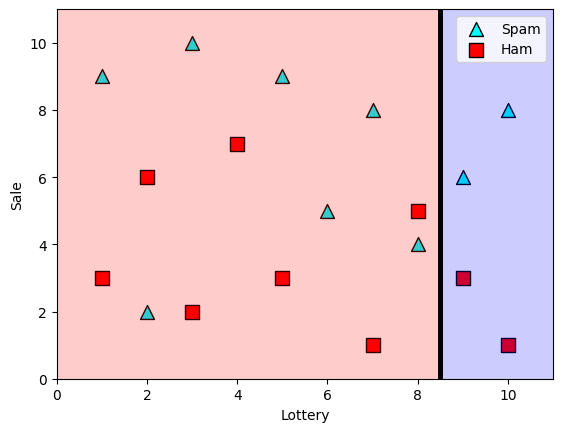

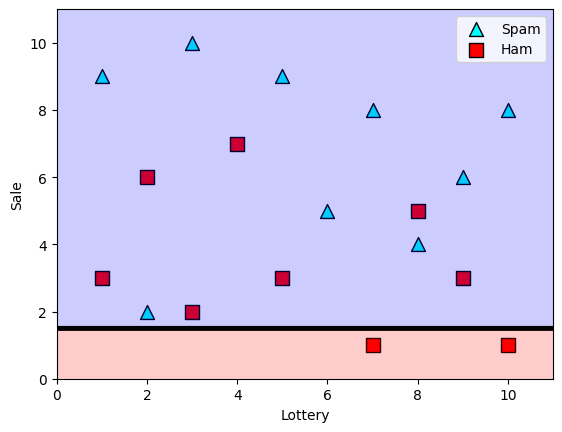

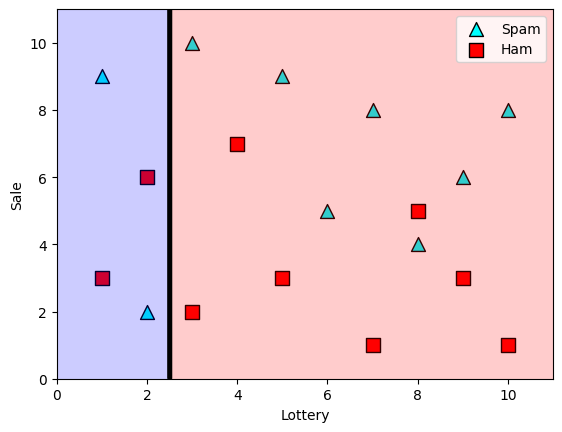

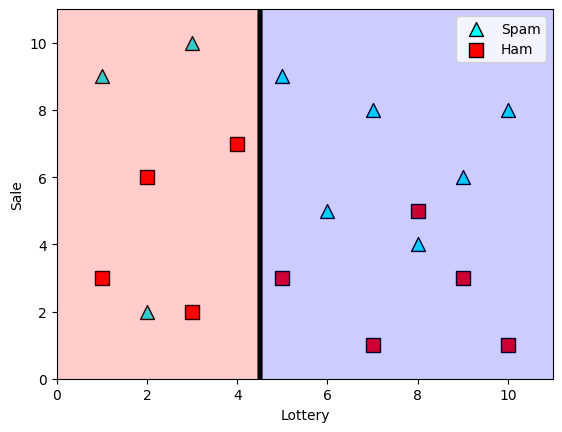

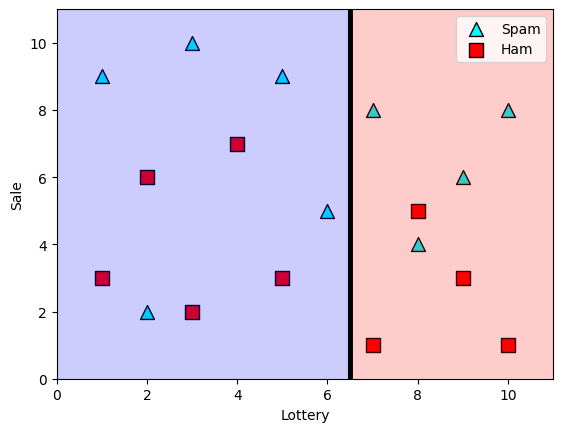

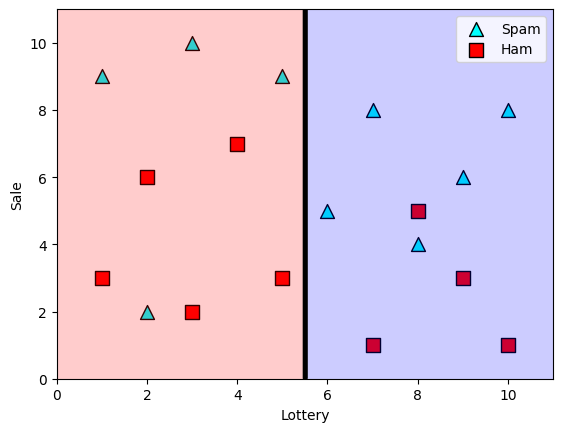

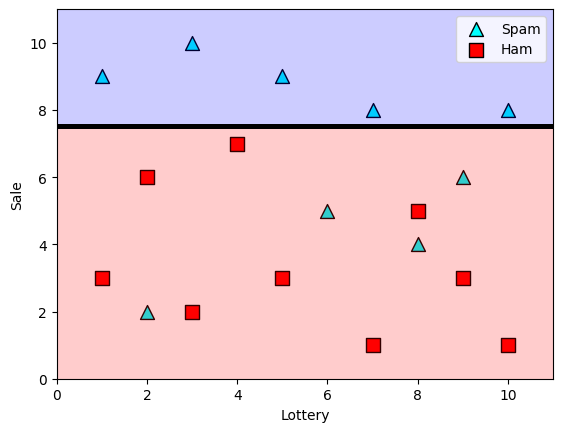

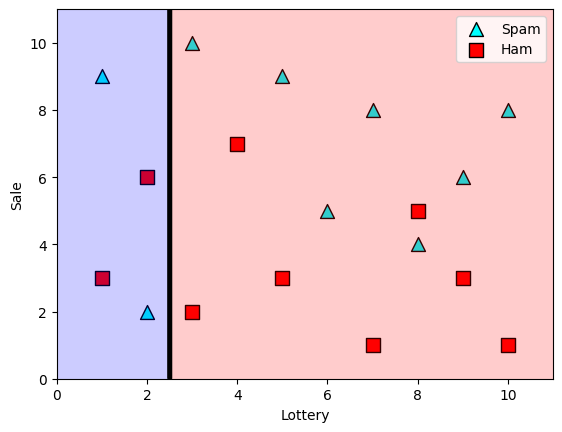

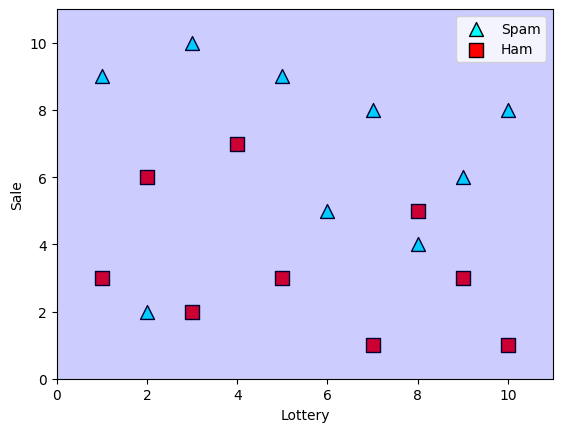

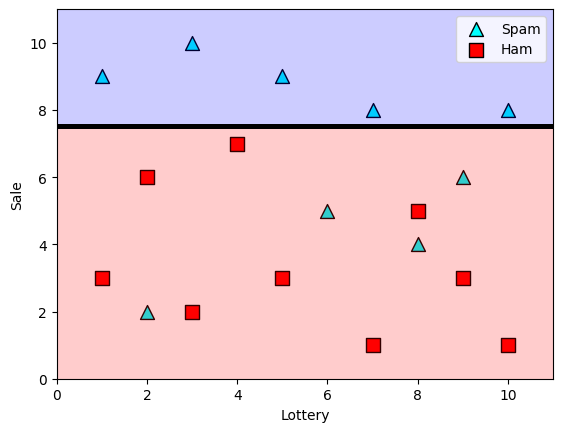

In [73]:
estimators = adaboost_classifier.estimators_
for estimator in estimators:
    plot_model(features, labels, estimator)
    plt.show()

In [74]:
adaboost_classifier.estimator_weights_

array([1.25276297, 1.19625076, 0.73639716, 0.67741931, 0.33053568,
       0.44590681, 0.36371379, 0.50592848, 0.40239782, 0.56410507,
       0.4465125 , 0.52865762, 0.3338458 , 0.32783477, 0.53196899,
       0.49161825, 0.5311029 , 0.16013225, 0.43043824, 0.35340888,
       0.18611826, 0.17023451, 0.15685381, 0.14542675, 0.25190205,
       0.22360618, 0.38992366, 0.39699841, 0.32468272, 0.208057  ,
       0.21302333, 0.43378275, 0.43004414, 0.14718987, 0.12406052,
       0.35558601, 0.41408716, 0.09194274, 0.2937378 , 0.25591571,
       0.24568007, 0.33447083, 0.17303224, 0.22907275, 0.42011092,
       0.34645026, 0.33229202, 0.31485945, 0.41821653, 0.06949868,
       0.11315836, 0.34667294, 0.35526199, 0.29915623, 0.2015814 ,
       0.10630732, 0.10093733, 0.09608417, 0.0916766 , 0.16507958,
       0.15246845, 0.18907162, 0.27759312, 0.44456387, 0.28420266,
       0.27670232, 0.50306521, 0.34199779, 0.34772809, 0.16199389,
       0.21074422, 0.21581066, 0.09174014, 0.28358618, 0.41314

In [81]:
adaboost_classifier.estimator_errors_

array([0.22222222, 0.23214286, 0.32379249, 0.33683753, 0.41811029,
       0.3903344 , 0.41006086, 0.37614847, 0.40073637, 0.36259816,
       0.39019027, 0.37083003, 0.41730517, 0.41876755, 0.37005777,
       0.37951242, 0.37025969, 0.46005226, 0.39402169, 0.41255602,
       0.45360429, 0.45754385, 0.46086675, 0.46370725, 0.43735539,
       0.44433022, 0.40373568, 0.40203372, 0.41953496, 0.44817257,
       0.44694465, 0.39322341, 0.39411579, 0.46326882, 0.46902459,
       0.41202849, 0.3979325 , 0.47703049, 0.42708904, 0.43636798,
       0.43888707, 0.4171532 , 0.45684955, 0.44298093, 0.39649021,
       0.41424349, 0.41768304, 0.42192905, 0.3969436 , 0.48263232,
       0.47174056, 0.41418946, 0.41210699, 0.42576376, 0.44977461,
       0.47344817, 0.47478707, 0.47599742, 0.47709689, 0.45882357,
       0.46195656, 0.45287241, 0.43104395, 0.39065403, 0.42942374,
       0.43126243, 0.3768206 , 0.41532427, 0.41393346, 0.45958986,
       0.44750808, 0.44625576, 0.47708104, 0.4295748 , 0.39815

In [84]:
adaboost_classifier.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=209652396),
 DecisionTreeClassifier(max_depth=1, random_state=398764591),
 DecisionTreeClassifier(max_depth=1, random_state=924231285),
 DecisionTreeClassifier(max_depth=1, random_state=1478610112),
 DecisionTreeClassifier(max_depth=1, random_state=441365315),
 DecisionTreeClassifier(max_depth=1, random_state=1537364731),
 DecisionTreeClassifier(max_depth=1, random_state=192771779),
 DecisionTreeClassifier(max_depth=1, random_state=1491434855),
 DecisionTreeClassifier(max_depth=1, random_state=1819583497),
 DecisionTreeClassifier(max_depth=1, random_state=530702035),
 DecisionTreeClassifier(max_depth=1, random_state=626610453),
 DecisionTreeClassifier(max_depth=1, random_state=1650906866),
 DecisionTreeClassifier(max_depth=1, random_state=1879422756),
 DecisionTreeClassifier(max_depth=1, random_state=1277901399),
 DecisionTreeClassifier(max_depth=1, random_state=1682652230),
 DecisionTreeClassifier(max_depth=1, random_state=243580376),


# Gradient boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=0, n_estimators=50)
gradient_boosting_classifier.fit(features, labels)
gradient_boosting_classifier.score(features, labels)

1.0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


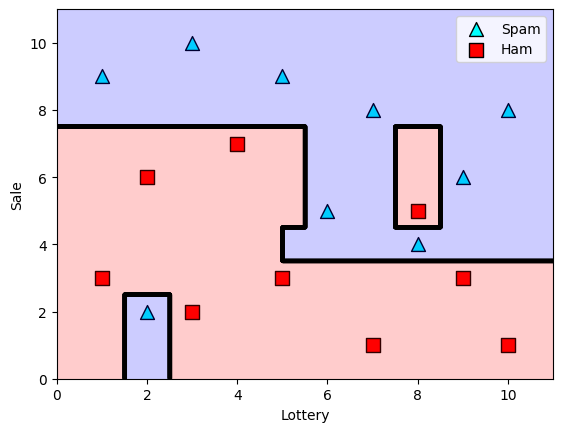

In [76]:
plot_model(features, labels, gradient_boosting_classifier)

In [77]:
estimators = gradient_boosting_classifier.estimators_

As an example, let us plot the first of the estimators.

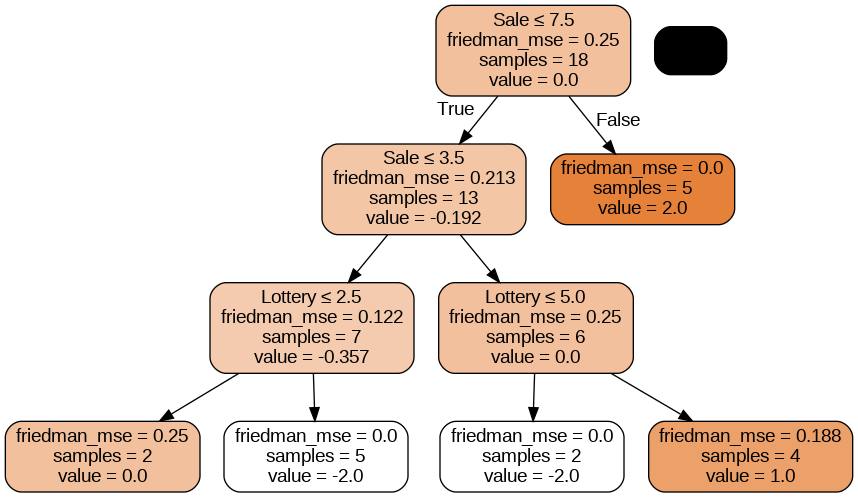

In [78]:
display_tree(estimators[0][0])

# XGBoost

In [79]:
import xgboost
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(random_state=0, n_estimators=9)
xgboost_classifier.fit(np.array(features), labels)
xgboost_classifier.score(np.array(features), labels)

0.8888888888888888

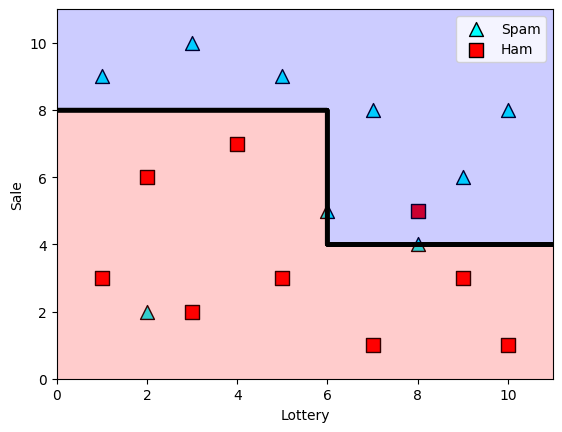

In [80]:
plot_model(features, labels, xgboost_classifier)